In [11]:
#pip install pandas-profiling

In [12]:
#pip install python-docx 

In [13]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from scipy.stats import pearsonr

In [14]:
original_data= pd.read_csv('Original Dataset_30 Variables_Not to be Shared.csv')
# original_report = ProfileReport(original_data, title='Original Data')
# original_report.to_file("original_report.html")

In [15]:
synthetic_data= pd.read_csv('CTGAN Generated data.csv')
# synthetic_data_report = ProfileReport(synthetic_data, title='Synthetic Data')
# synthetic_data_report.to_file("SyntheticData_report.html")

In [16]:
# comparison_report = original_report.compare(synthetic_data_report)
# comparison_report.to_file("original_vs_transformed.html")

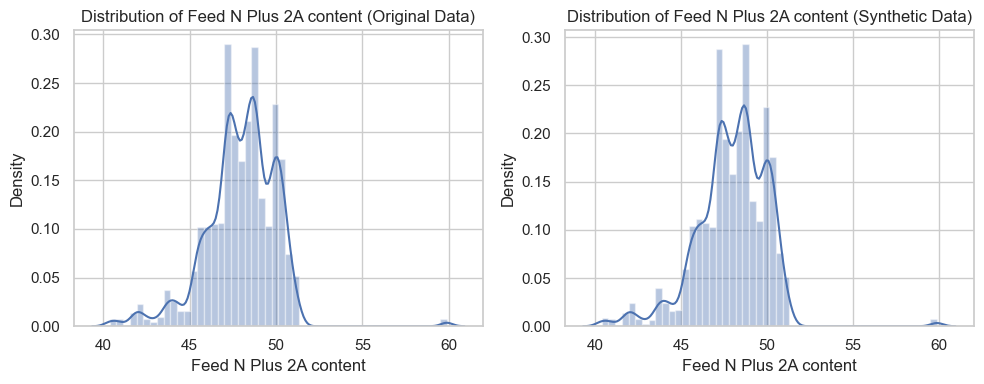

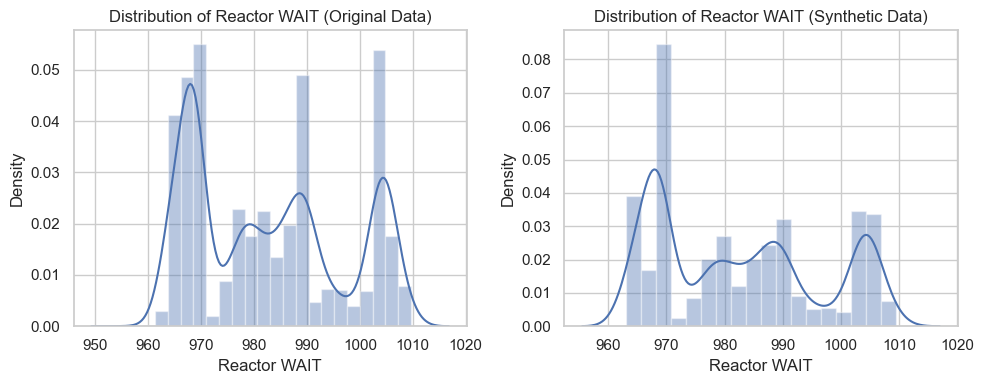

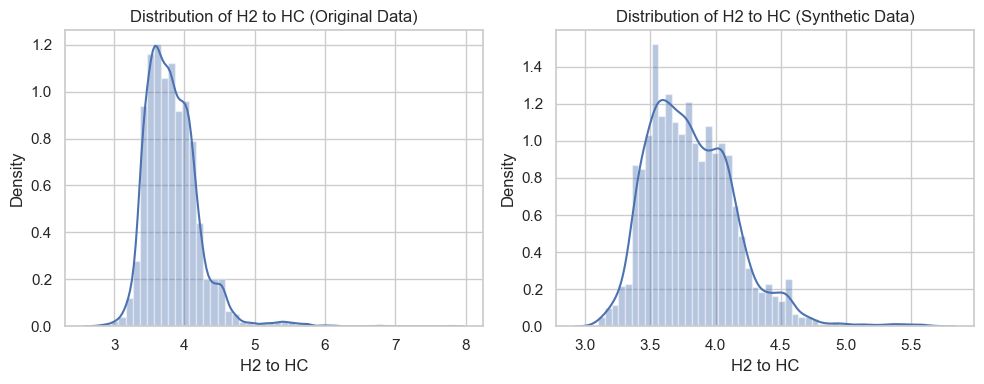

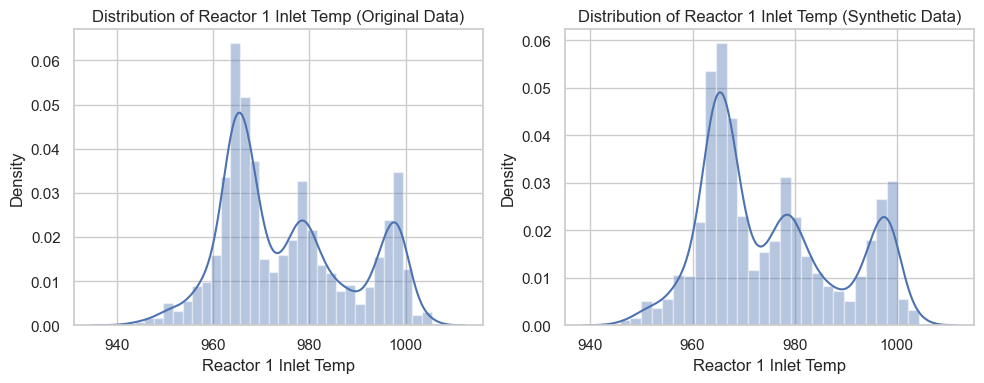

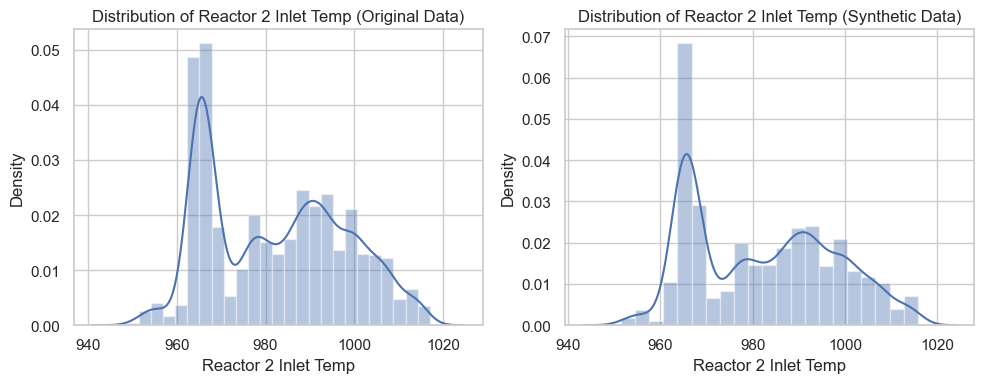

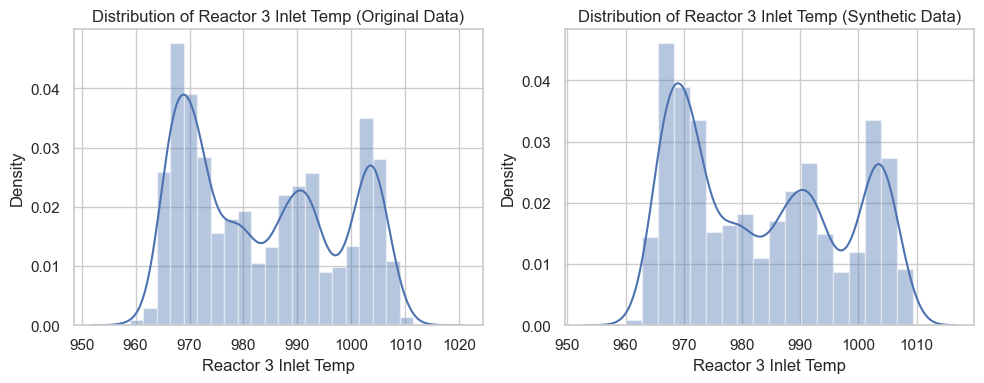

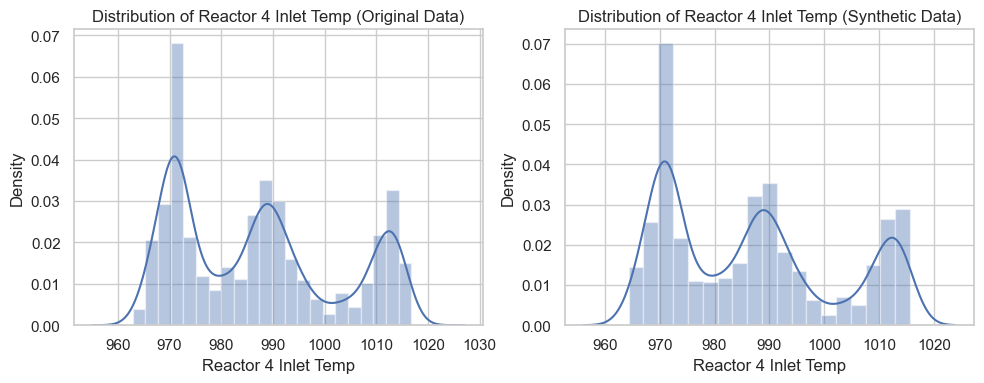

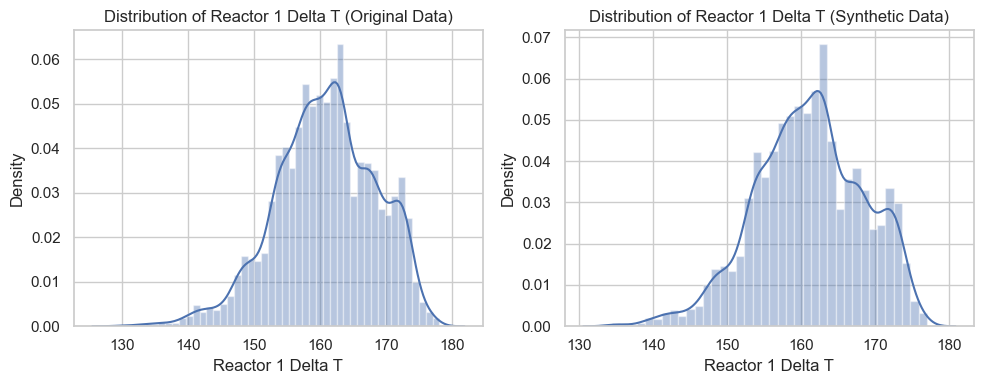

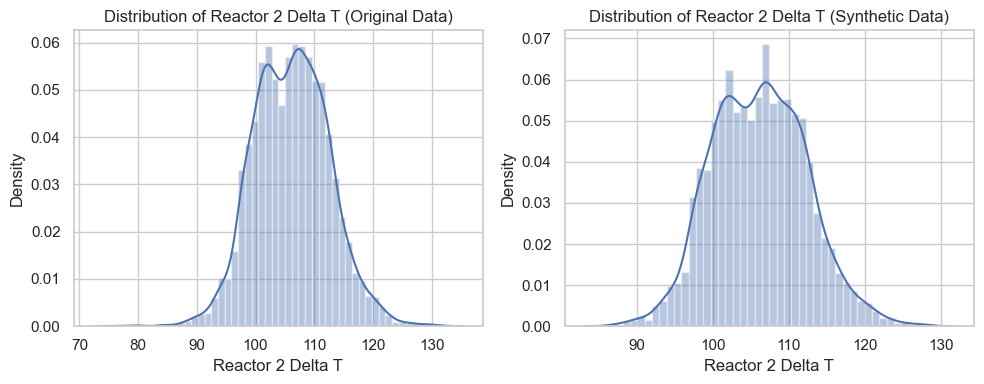

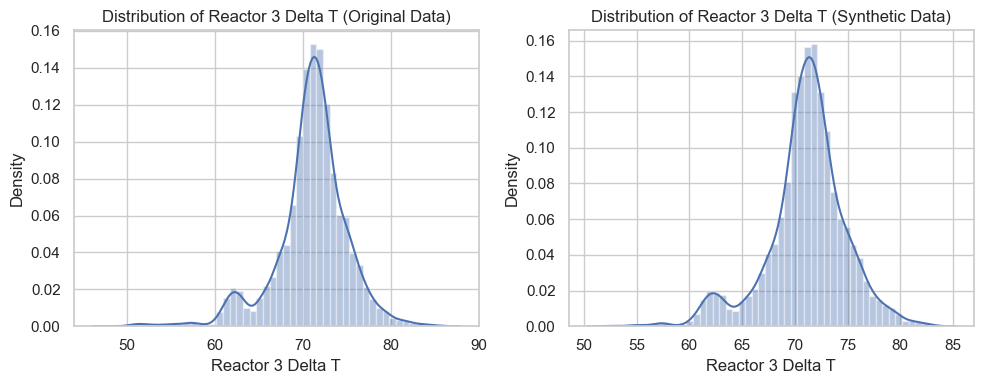

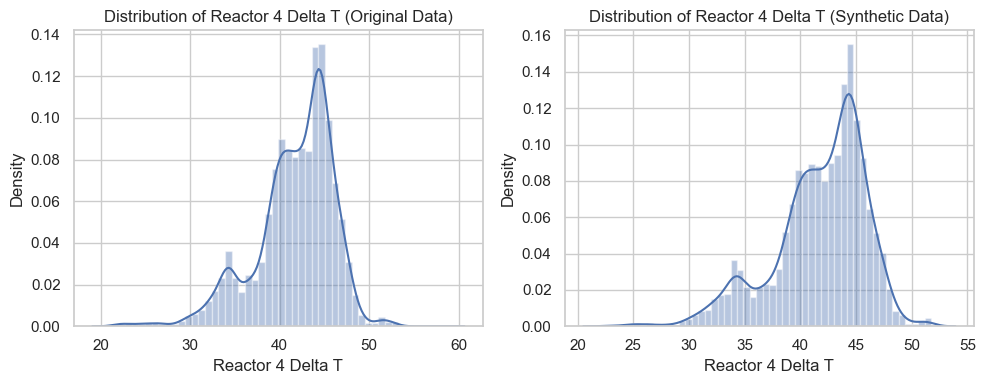

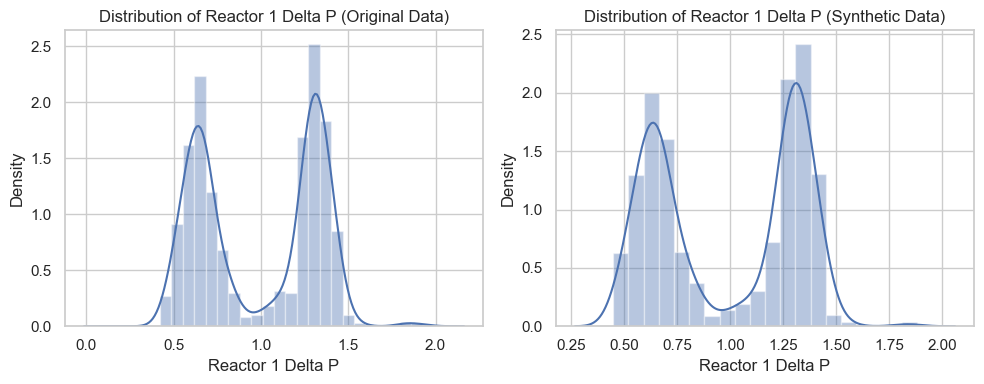

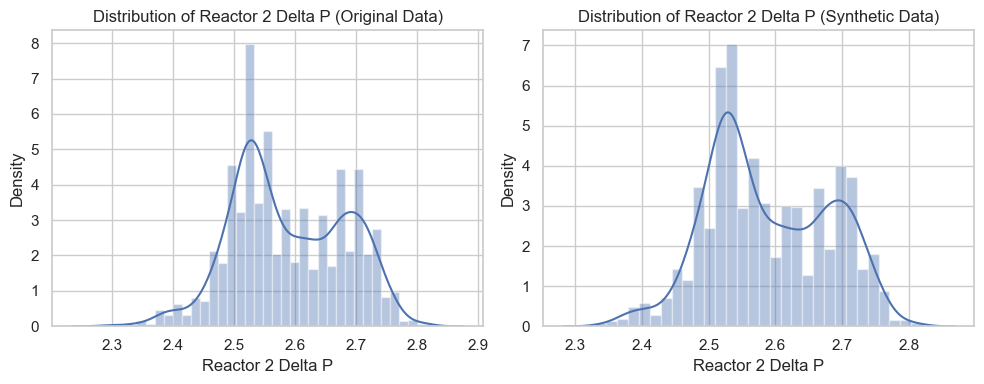

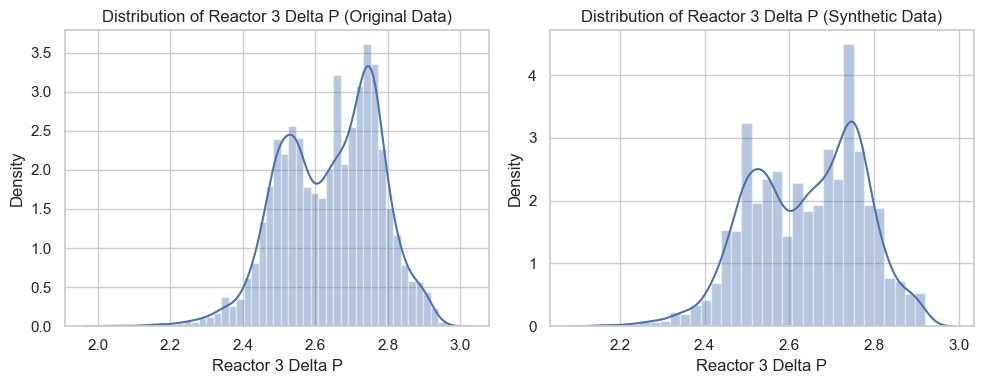

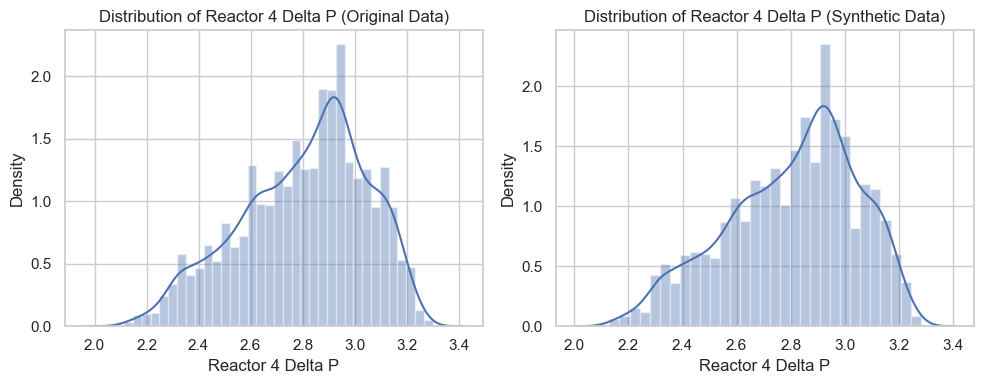

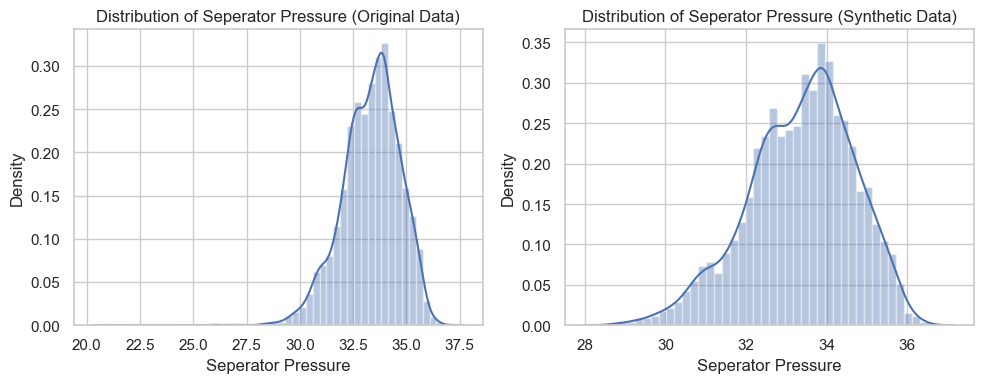

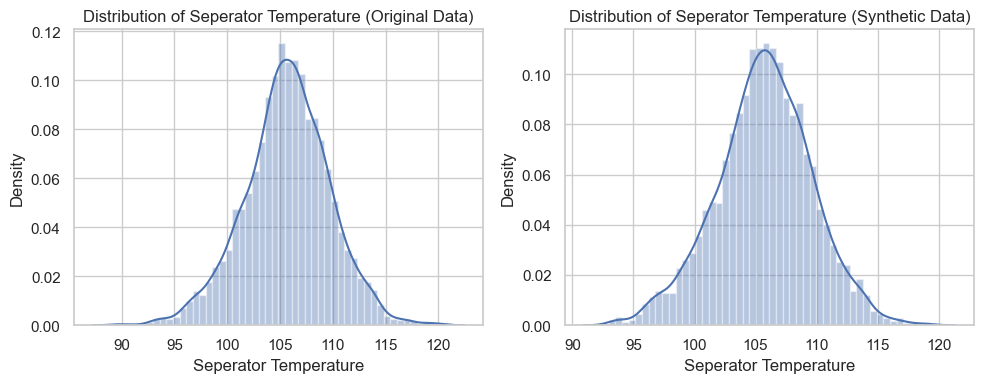

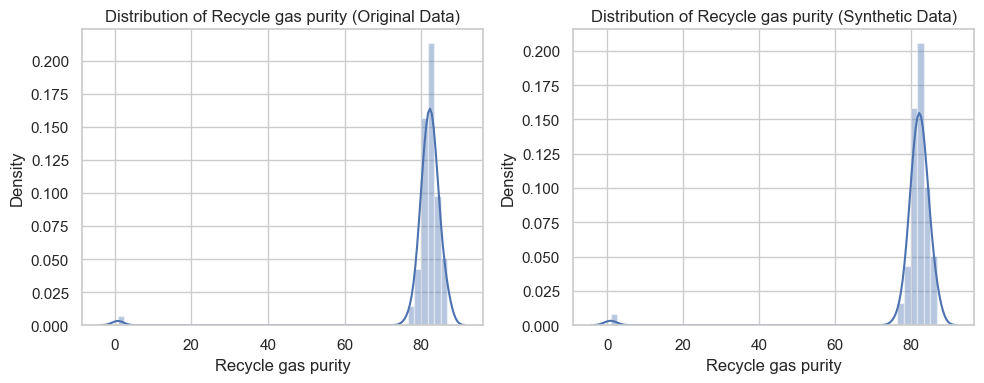

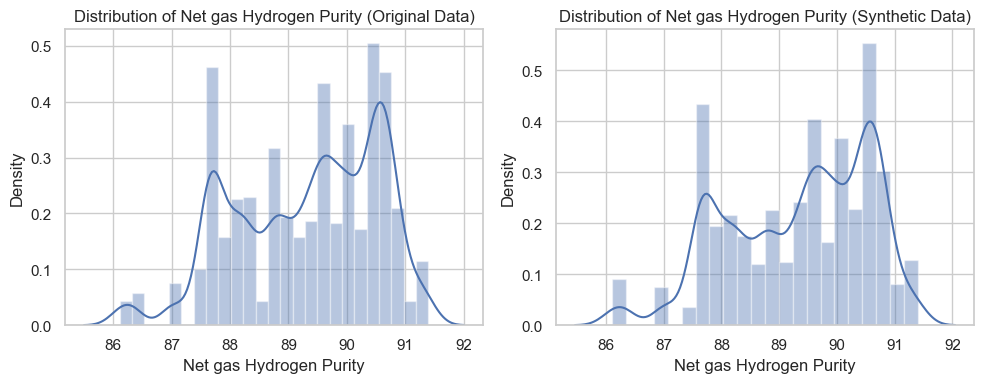

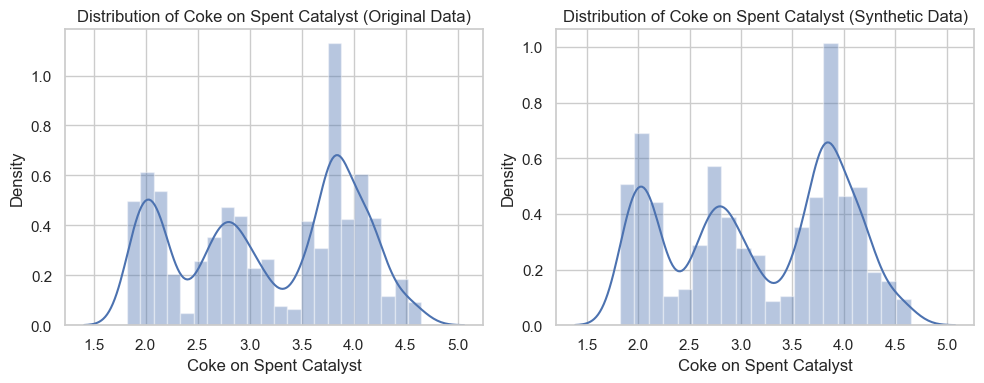

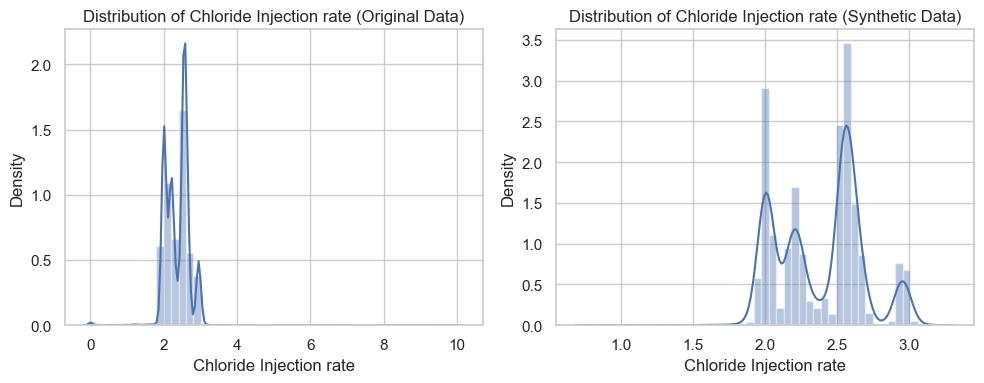

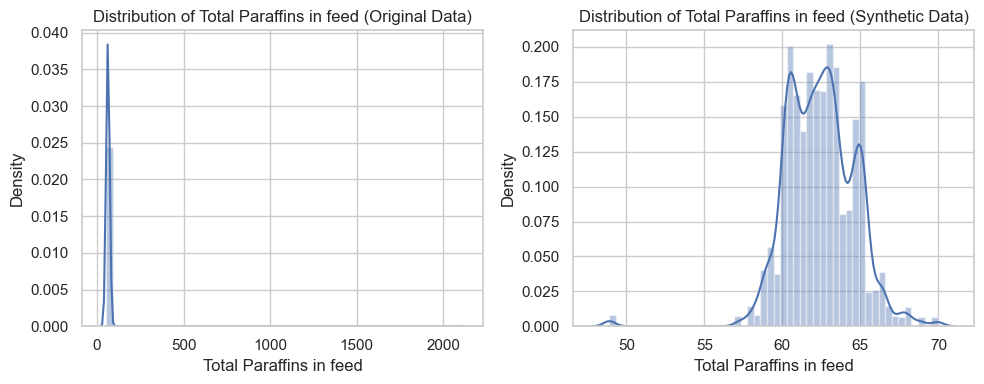

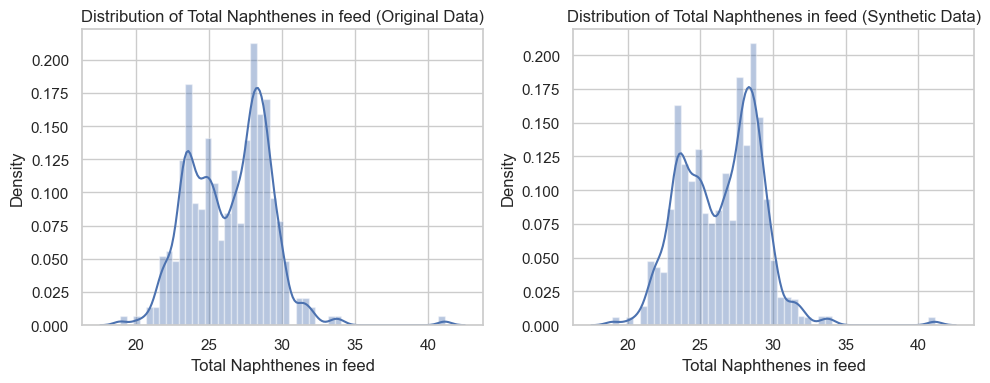

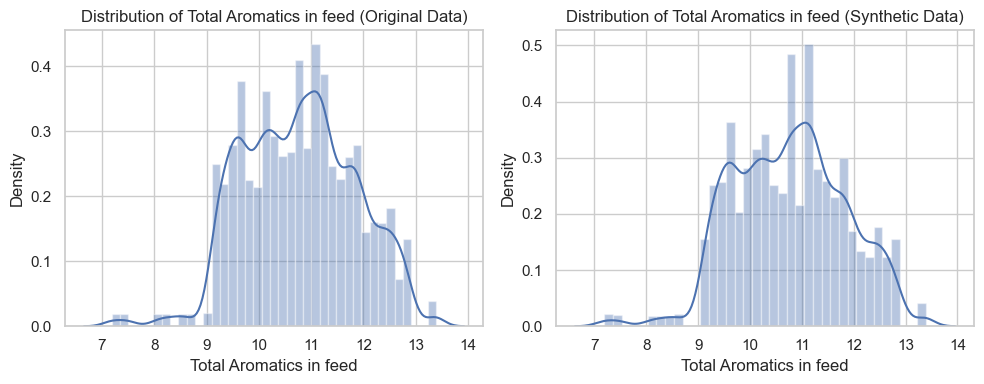

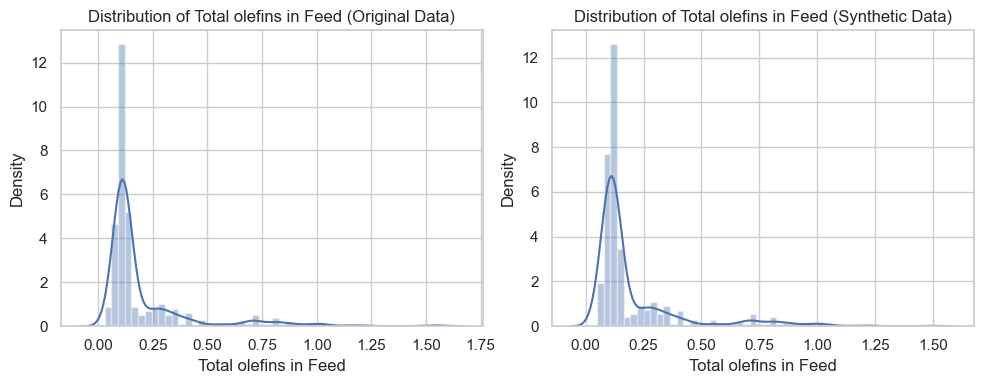

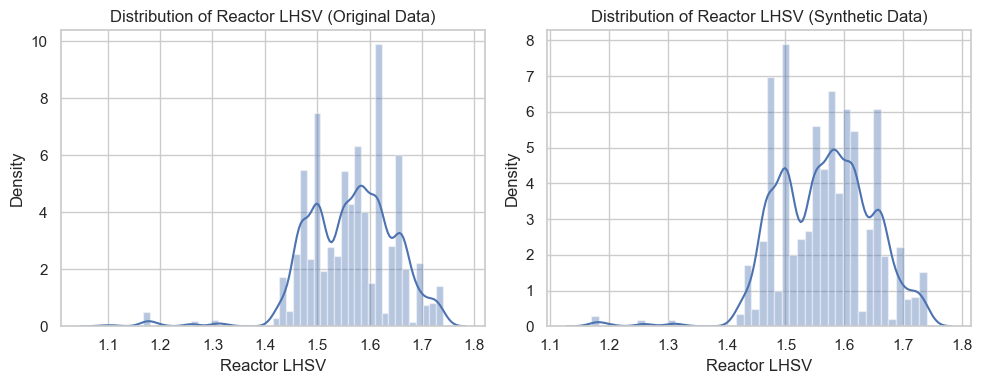

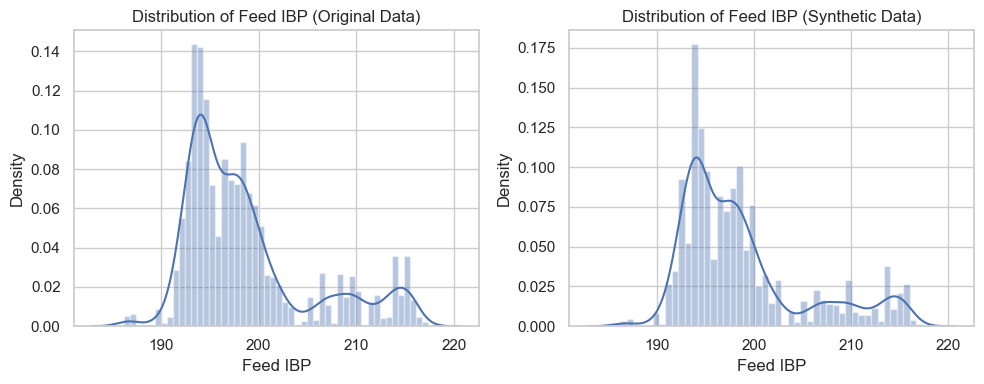

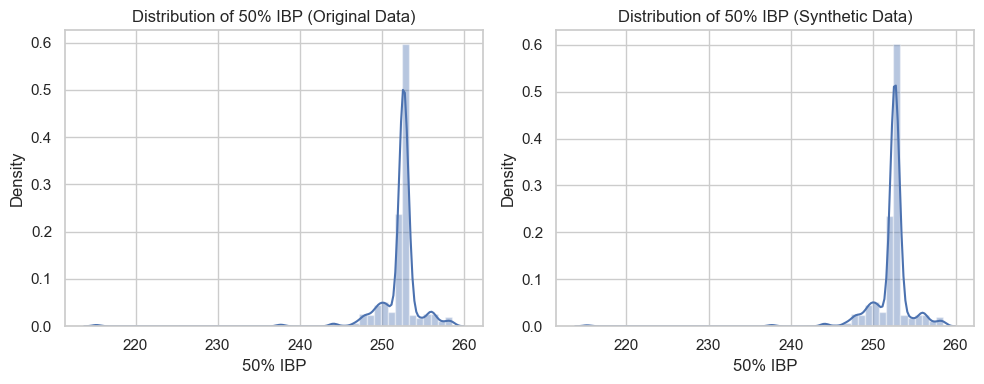

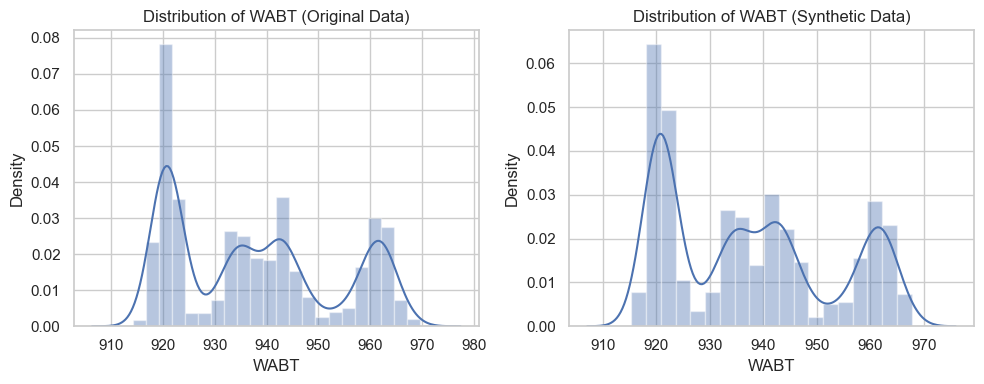

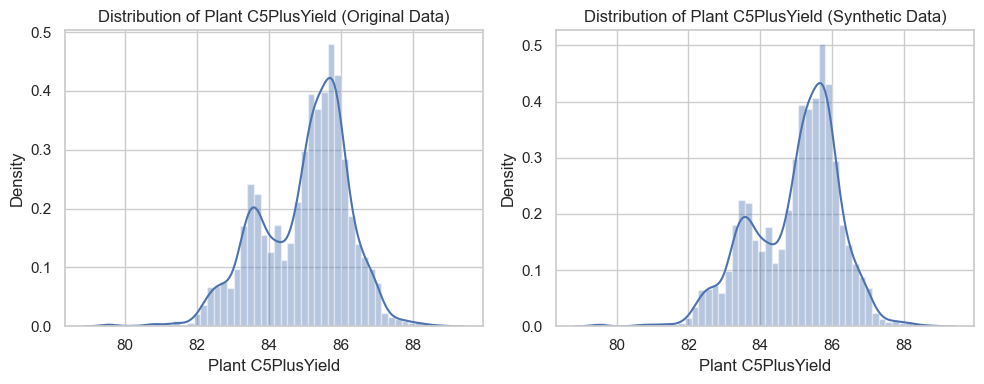

Plots saved as 'plots_directory/distplots.zip'


In [17]:
## Distribution plots to compare original vs synthetic data vissually
def plot_distplot_pairs(df1, df2, data1_name, data2_name, save_path):
    # Set the seaborn theme
    sns.set_theme(style='whitegrid')
    
    # Get the common columns between the two dataframes
    common_columns = df1.columns.intersection(df2.columns)
    
    # Create the directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)
    
    # Create a zip file to store the plots
    with zipfile.ZipFile(f'{save_path}/distplots.zip', 'w') as zipf:
        # Iterate over each common column
        for column in common_columns:
            # Create subplots for each pair of distplots
            fig, axs = plt.subplots(1, 2, figsize=(10, 4))
            
            # Plot distplot for df1
            sns.distplot(df1[column], ax=axs[0])
            axs[0].set_title(f'Distribution of {column} ({data1_name})')
            
            # Plot distplot for df2
            sns.distplot(df2[column], ax=axs[1])
            axs[1].set_title(f'Distribution of {column} ({data2_name})')
            
            # Adjust spacing between subplots
            plt.tight_layout()
            
            # Save the plot as an image
            plot_filename = f'{column}.png'
            plot_path = f'{save_path}/{plot_filename}'
            plt.savefig(plot_path)
            
            # Add the saved image to the zip file
            zipf.write(plot_path, arcname=plot_filename)
            
            # Show the plot
            plt.show()
            
            # Close the plot
            plt.close()
    
    print(f"Plots saved as '{save_path}/distplots.zip'")


data1_name = "Original Data"
data2_name = "Synthetic Data"
save_path = "plots_directory"
plot_distplot_pairs(original_data, synthetic_data, data1_name, data2_name, save_path)

In [18]:
# Dataframe Summary comparison
def calculate_summary_statistics(data):
    summary_stats = data.describe().transpose()
    summary_stats['median'] = data.median()
    return summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'median']]

def compare_summary_statistics(original_data, synthetic_data):
    original_stats = calculate_summary_statistics(original_data)
    synthetic_stats = calculate_summary_statistics(synthetic_data)
    
    comparison_table = pd.concat([original_stats, synthetic_stats], axis=1, keys=['Original Data', 'Synthetic Data'])
    return comparison_table


summary_comparison_table = compare_summary_statistics(original_data, synthetic_data)
summary_comparison_table

Original Data                                 \
                                 count        mean        std     min   
Feed N Plus 2A content          7882.0   47.976056   2.037363   40.38   
Reactor WAIT                    7882.0  982.706760  14.361024  956.40   
H2 to HC                        7882.0    3.821718   0.372182    2.76   
Reactor 1 Inlet Temp            7882.0  975.360089  13.693660  941.75   
Reactor 2 Inlet Temp            7882.0  982.323996  15.599825  948.76   
Reactor 3 Inlet Temp            7882.0  983.784026  14.004152  958.95   
Reactor 4 Inlet Temp            7882.0  986.966524  15.722209  962.90   
Reactor 1 Delta T               7882.0  160.881586   7.579552  129.35   
Reactor 2 Delta T               7882.0  106.128895   6.387439   75.37   
Reactor 3 Delta T               7882.0   71.011284   4.095590   48.10   
Reactor 4 Delta T               7882.0   41.694635   4.379323   21.24   
Reactor 1 Delta P               7882.0    0.990741   0.345861    0.16   
Reactor 2 Delta P               7882.0    2.588273   0.093082    2.28   
Reactor 3 Delta P               7882.0    2.642166   0.135004    2.03   
Reactor 4 Delta P               7882.0    2.804509   0.241722    2.08   
Seperator Pressure              7882.0   33.333715   1.339706   20.93   
Seperator Temperature           7882.0  105.665434   4.046135   89.24   
Recycle gas purity              7882.0   81.346800   9.148243    0.86   
Net gas Hydrogen Purity         7882.0   89.323787   1.219458   86.11   
Coke on Spent Catalyst          7882.0    3.181111   0.821481    1.82   
Chloride Injection rate         7882.0    2.374787   0.343244    0.00   
Total Paraffins in feed         7882.0   64.251845  60.531753   48.92   
Total Naphthenes in feed        7882.0   26.427558   2.739174   18.94   
Total Aromatics in feed         7882.0   10.773975   1.065247    7.19   
Total olefins in Feed           7882.0    0.208891   0.226918    0.03   
Reactor LHSV                    7882.0    1.564491   0.085537    1.09   
Feed IBP                        7882.0  198.726871   6.565372  186.23   
50% IBP                         7882.0  252.215292   2.962630  215.23   
WABT                            7882.0  937.694057  15.687581  914.14   
Plant C5PlusYield               7882.0   84.979594   1.235512   79.48   

                                                                         \
                               25%      50%       75%      max   median   
Feed N Plus 2A content     47.0200   48.150   49.3400    59.89   48.150   
Reactor WAIT              968.5400  980.920  993.3200  1009.66  980.920   
H2 to HC                    3.5600    3.780    4.0300     7.79    3.780   
Reactor 1 Inlet Temp      964.7900  971.180  984.7675  1005.35  971.180   
Reactor 2 Inlet Temp      966.4900  982.290  994.5375  1016.96  982.290   
Reactor 3 Inlet Temp      970.5525  982.060  996.0050  1013.95  982.060   
Reactor 4 Inlet Temp      971.6300  986.580  996.5875  1019.20  986.580   
Reactor 1 Delta T         156.0400  161.110  166.4575   178.08  161.110   
Reactor 2 Delta T         101.5000  106.155  110.4900   132.41  106.155   
Reactor 3 Delta T          69.4400   71.310   73.1800    85.91   71.310   
Reactor 4 Delta T          39.5500   42.500   44.7200    58.45   42.500   
Reactor 1 Delta P           0.6500    1.090    1.3100     1.99    1.090   
Reactor 2 Delta P           2.5200    2.570    2.6700     2.83    2.570   
Reactor 3 Delta P           2.5400    2.660    2.7500     2.96    2.660   
Reactor 4 Delta P           2.6400    2.840    2.9800     3.30    2.840   
Seperator Pressure         32.4900   33.460   34.2700    37.05   33.460   
Seperator Temperature     103.2600  105.760  108.3100   120.44  105.760   
Recycle gas purity         80.8800   82.550   83.4500    86.82   82.550   
Net gas Hydrogen Purity    88.2500   89.580   90.4400    91.40   89.580   
Coke on Spent Catalyst      2.5000    3.210    3.8400     4.65    3.210   
Chloride Injection rate     2.0800    

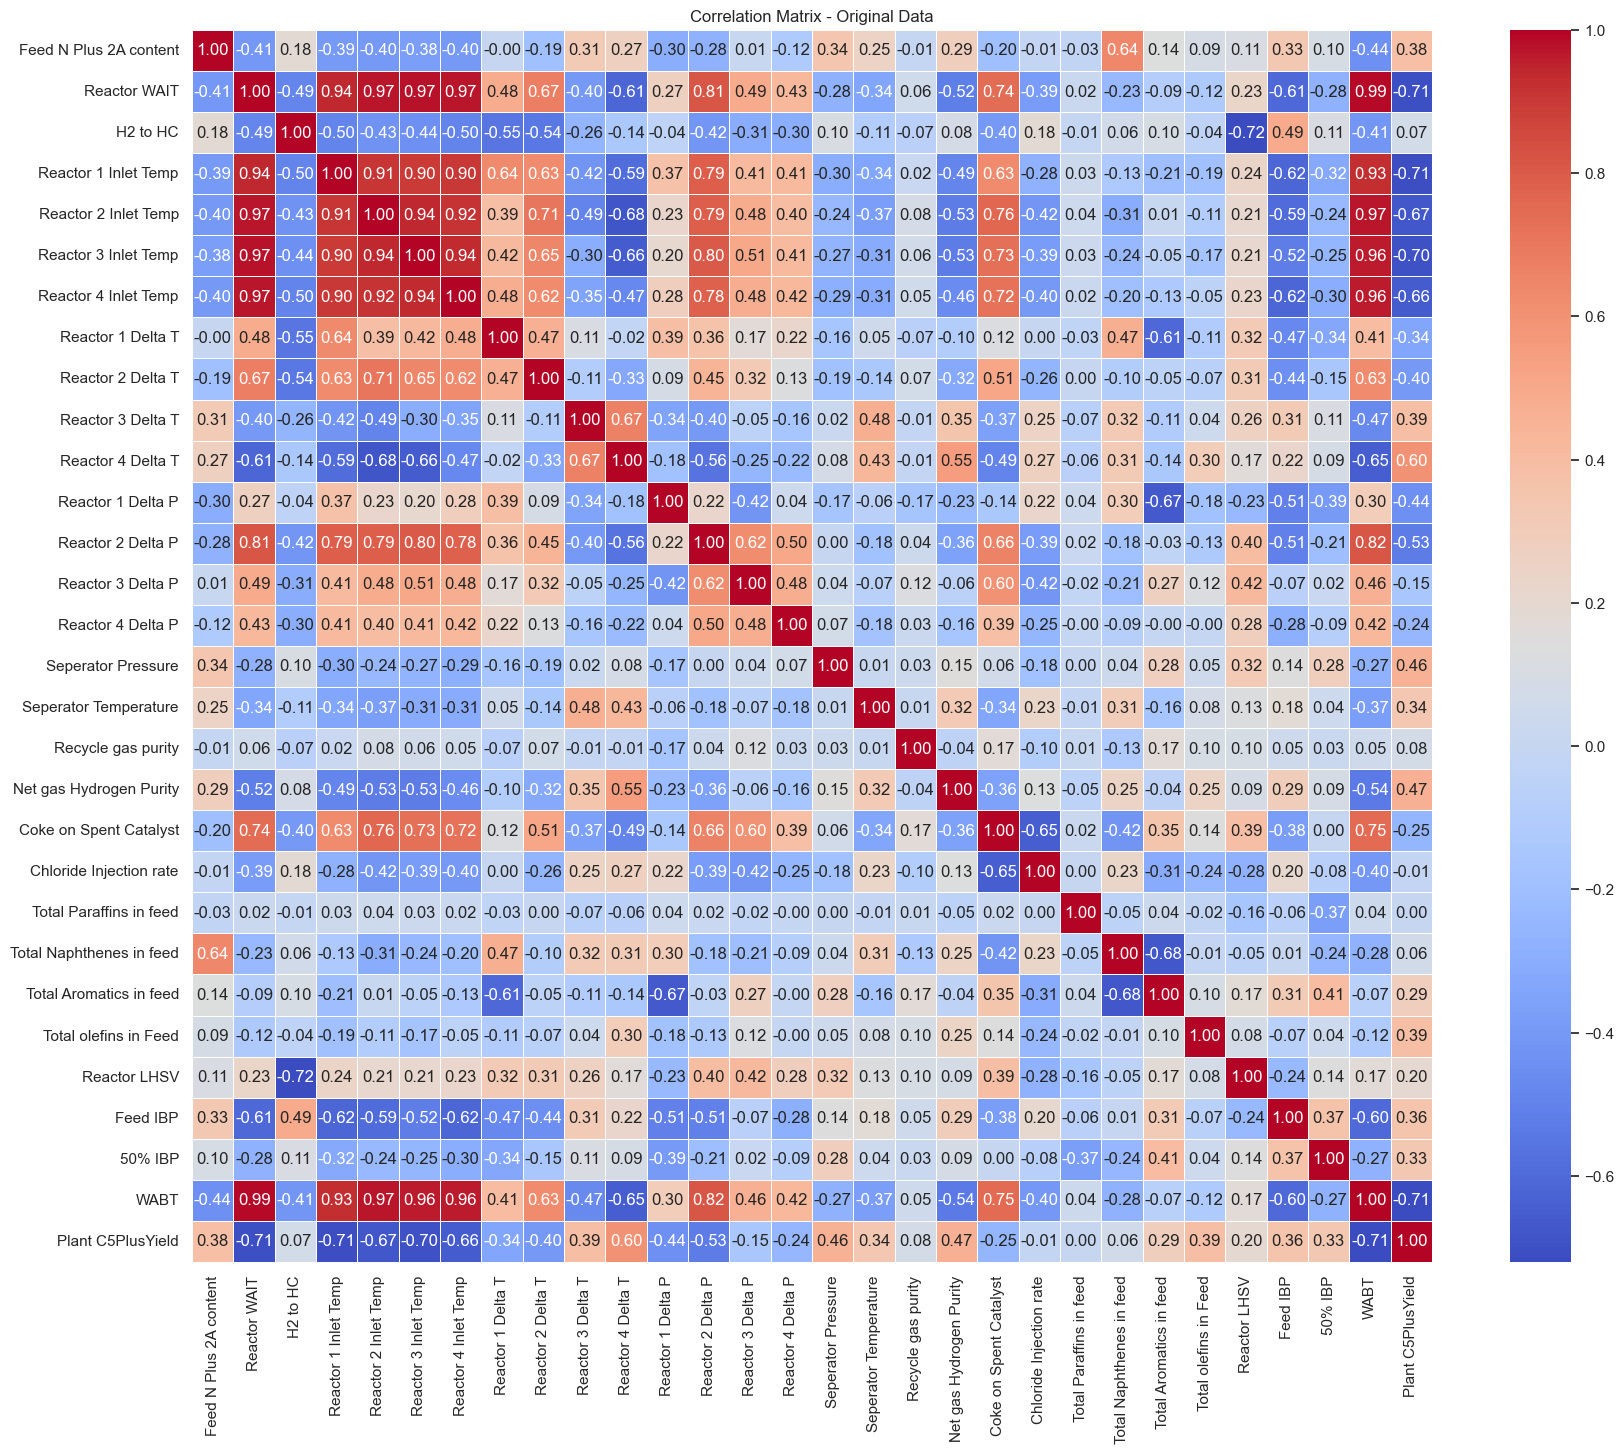

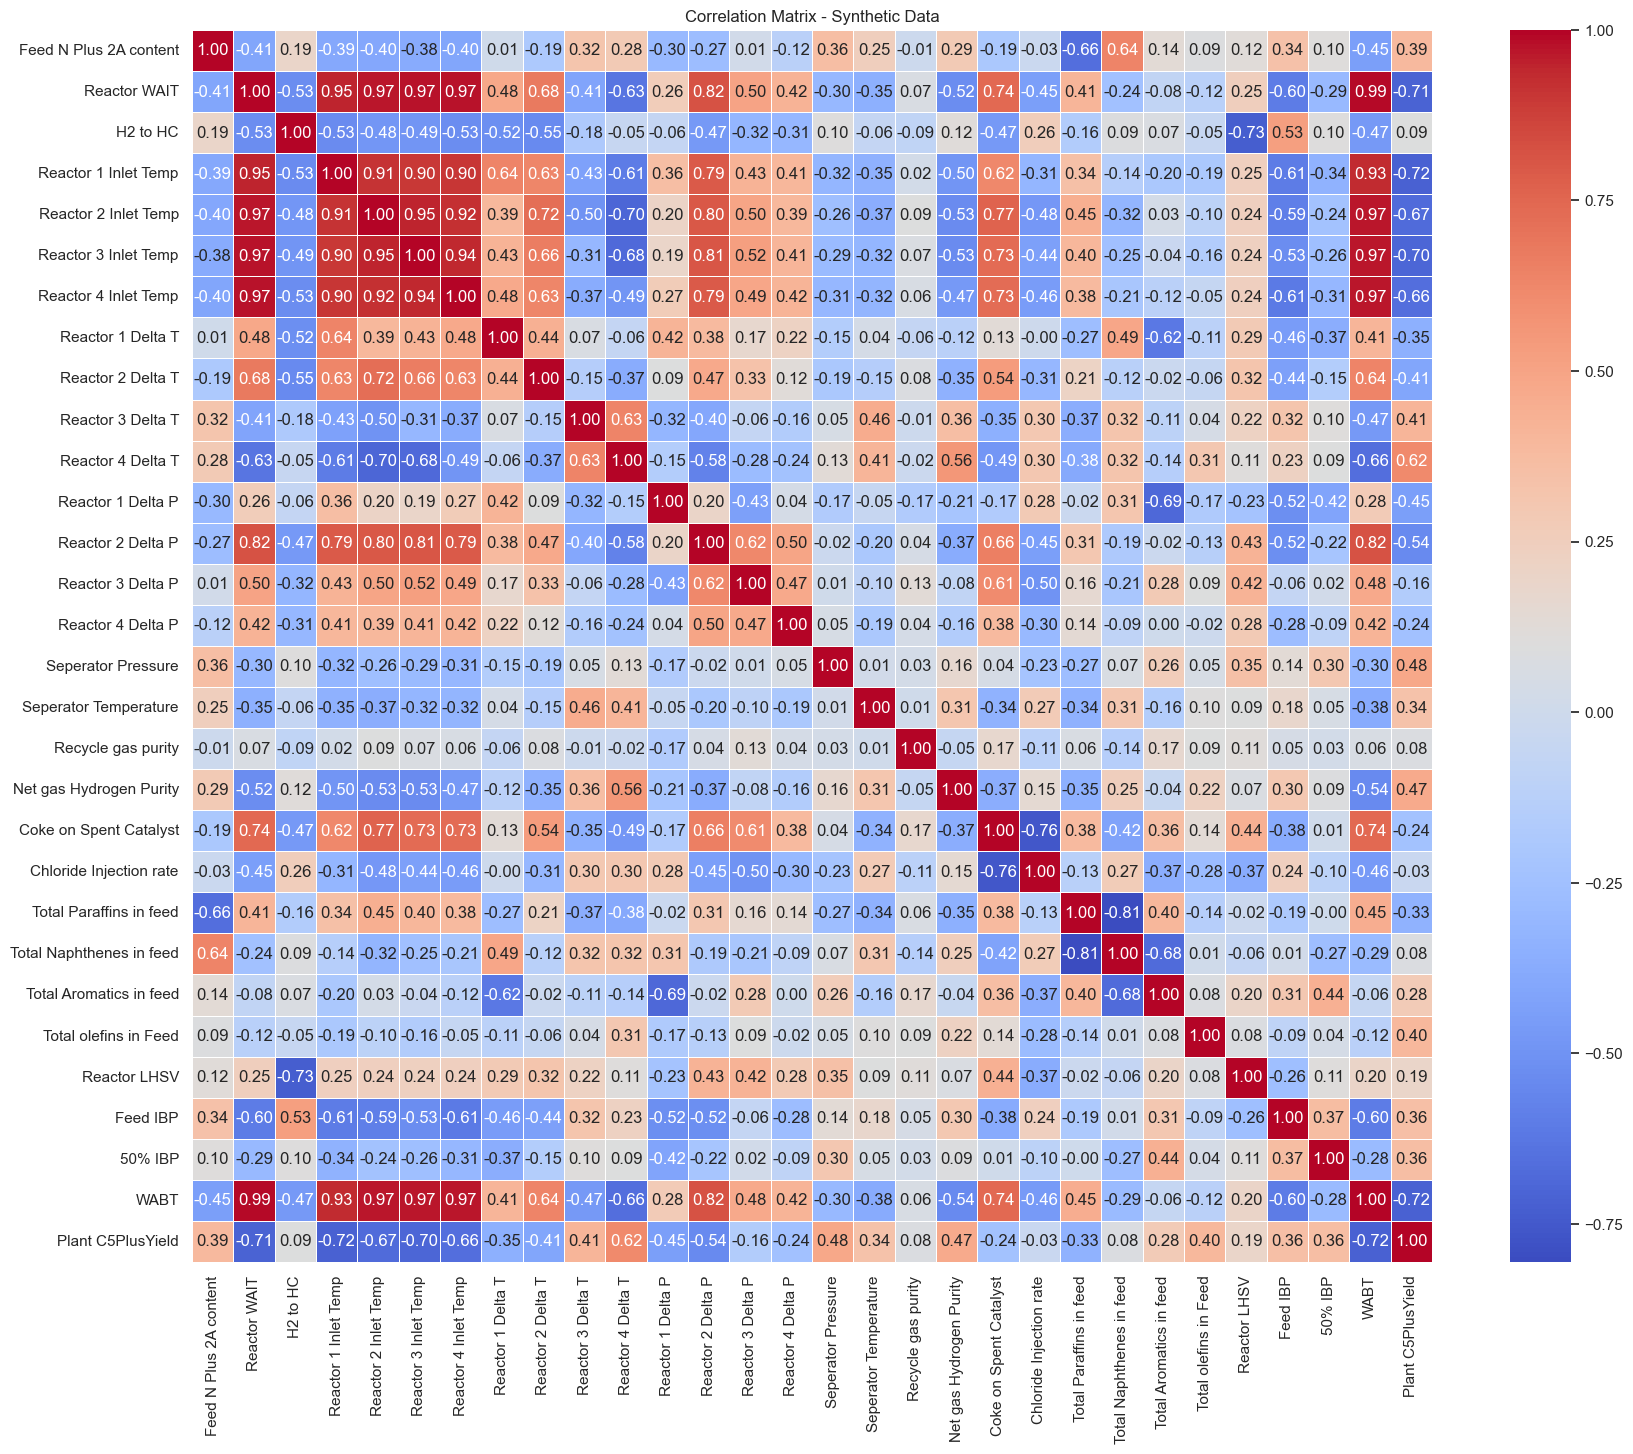

In [19]:
# Compute correlation matrix for original_data
original_corr = original_data.corr()

# Compute correlation matrix for synthetic_data
synthetic_corr = synthetic_data.corr()

# Plot correlation matrix for original_data
plt.figure(figsize=(20, 16))
sns.heatmap(original_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix - Original Data')
plt.show()

# Plot correlation matrix for synthetic_data
plt.figure(figsize=(20, 16))
sns.heatmap(synthetic_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix - Synthetic Data')
plt.show()

In [20]:
# Extract the "Plant C5PlusYield" column from both dataframes
original_target = original_data["Plant C5PlusYield"]
synthetic_target = synthetic_data["Plant C5PlusYield"]

# Initialize an empty dataframe to store the correlation results
correlation_df = pd.DataFrame(columns=["Column-Pair", "Original Correlation", "Synthetic Correlation"])

# Iterate through each column in the original_data dataframe
for column in original_data.columns:
    # Skip the "Plant C5PlusYield" column
    if column == "Plant C5PlusYield":
        continue
    
    # Calculate the Pearson correlation for the original_data dataframe
    original_corr, _ = pearsonr(original_data[column], original_target)
    
    # Calculate the Pearson correlation for the synthetic_data dataframe
    synthetic_corr, _ = pearsonr(synthetic_data[column], synthetic_target)
    
    # Append the results to the correlation dataframe
    correlation_df = correlation_df.append({
        "Column-Pair": column,
        "Original Correlation": original_corr,
        "Synthetic Correlation": synthetic_corr
    }, ignore_index=True)

# Print the correlation dataframe
correlation_df

Column-Pair  Original Correlation  Synthetic Correlation
0     Feed N Plus 2A content              0.382200               0.390723
1               Reactor WAIT             -0.705501              -0.707660
2                   H2 to HC              0.072479               0.090593
3       Reactor 1 Inlet Temp             -0.708477              -0.718298
4       Reactor 2 Inlet Temp             -0.673569              -0.673391
5       Reactor 3 Inlet Temp             -0.698320              -0.697402
6       Reactor 4 Inlet Temp             -0.658659              -0.664151
7          Reactor 1 Delta T             -0.340005              -0.353268
8          Reactor 2 Delta T             -0.401247              -0.407639
9          Reactor 3 Delta T              0.393166               0.408004
10         Reactor 4 Delta T              0.602311               0.616397
11         Reactor 1 Delta P             -0.441016              -0.446243
12         Reactor 2 Delta P             -0.529404              -0.539138
13         Reactor 3 Delta P             -0.152238              -0.163390
14         Reactor 4 Delta P             -0.243650              -0.243682
15        Seperator Pressure              0.458794               0.480809
16     Seperator Temperature              0.335676               0.335589
17        Recycle gas purity              0.078186               0.077599
18   Net gas Hydrogen Purity              0.465102               0.468186
19    Coke on Spent Catalyst             -0.251571              -0.241133
20   Chloride Injection rate             -0.009619              -0.034867
21   Total Paraffins in feed              0.002509              -0.333527
22  Total Naphthenes in feed              0.062026               0.075786
23   Total Aromatics in feed              0.287626               0.277741
24     Total olefins in Feed              0.392807               0.399858
25              Reactor LHSV              0.198023               0.193197
26                  Feed IBP              0.360778               0.357431
27                   50% IBP              0.329538               0.362343
28                      WABT             -0.714266              -0.716756

In [21]:
correlation_df.to_csv('Correlation Number OriginalvsSynthetic.csv', index=False)

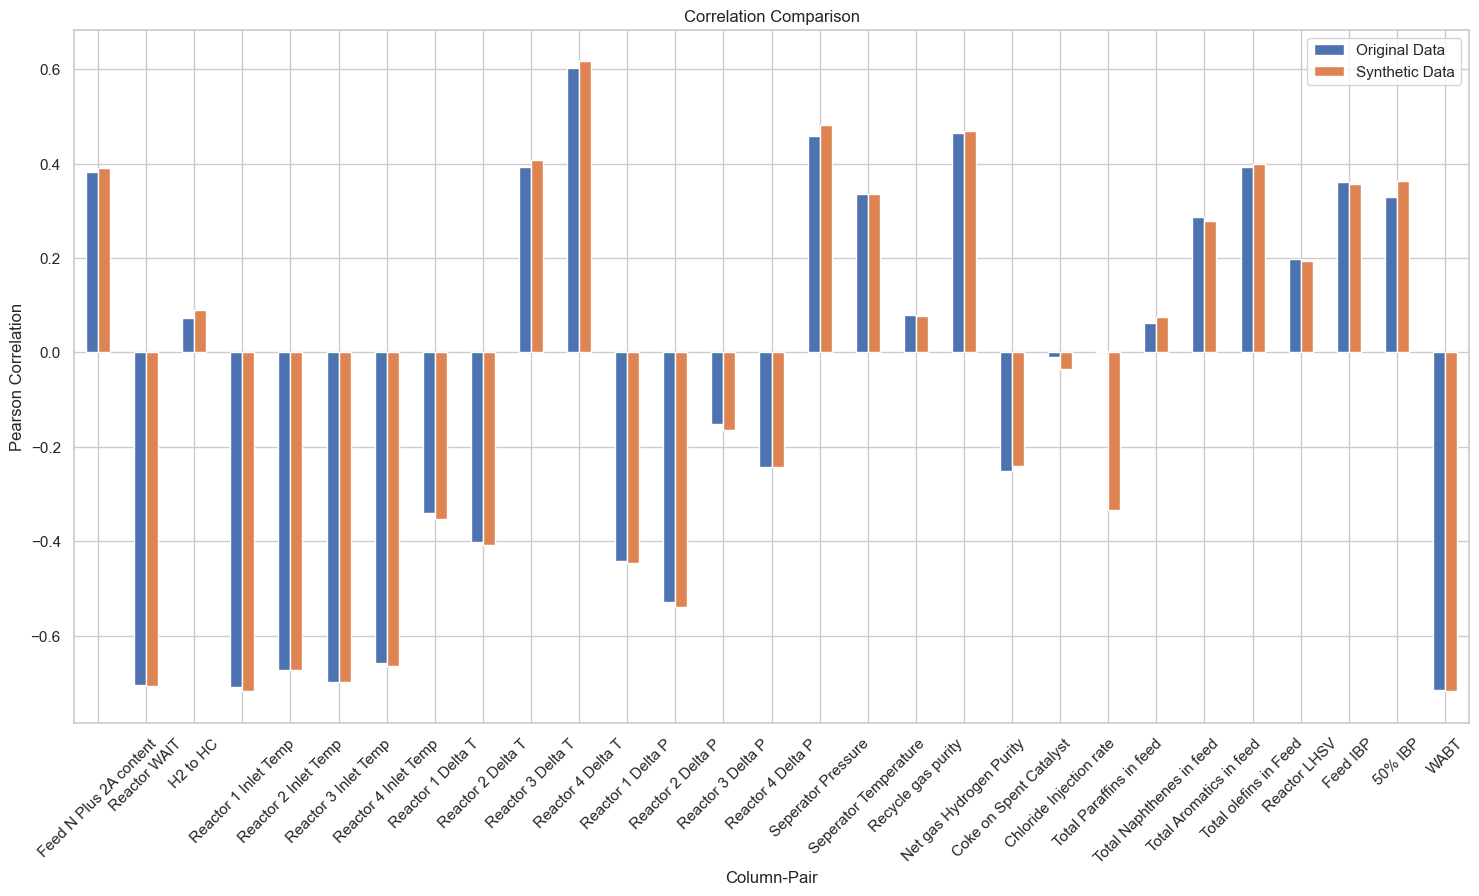

In [11]:
# Set the column pair as the index for the correlation table
correlation_df.set_index('Column-Pair', inplace=True)

# Plot the correlation values
correlation_df.plot(kind='bar', figsize=(18, 9))
plt.title('Correlation Comparison')
plt.xlabel('Column-Pair')
plt.ylabel('Pearson Correlation')
plt.xticks(rotation=45)
plt.legend(['Original Data', 'Synthetic Data'])
plt.show()